<a href="https://colab.research.google.com/github/MarycieloMamani/Python_2023/blob/main/13_Eval_Culqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA APLICADO A CULQI

In [ ]:
#Cargamos nuestra data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

culqi_df = pd.read_excel("/content/drive/MyDrive/1 Bootcamp_Python_DSRP/6_SextaClase/Ejercicio 2_.xlsx")

culqi_df.head(3)

cdf = culqi_df.dropna()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cdf.shape

(5034, 11)

In [ ]:
cdf.head(4)

,FECHA VENTA,CANAL VENTA,RUC CLIENTE,VENDEDOR,VENTA ACTIVA,FECHA ACTIVACION,FLUJO MES VENTA,GIRO ECONOMICO,DEPARTAMENTO,TIPO PRODUCTO,PRODUCTO
13920,2022-01-17,DEALERS,GJFGCACJ,OMAR BUSTAMANTE,1,2022-01-25,100.0,SERVICIO,LIMA,OFFLINE,CULQI PRO
13921,2022-02-16,DEALERS,DHAGICHD,MARCO CHANAME,1,2022-02-25,100.0,COMERCIO,LIMA,OFFLINE,CULQI PRO
13922,2022-02-17,DEALERS,GEDBJJBA,RUTH PEREYRA,1,2022-02-27,100.0,TRANSPORTE,LIMA,OFFLINE,CULQI PRO
13924,2022-03-22,BANCOS,BJFJCFHGJFA,JORGE SALAZAR,1,2022-03-29,100.0,RESTAURANTES,CALLAO,OFFLINE,CULQI PRO


Distribución de Variables:

*  ¿Cuáles son los canales de venta más comunes?
*  ¿Qué productos se venden más?
*  ¿Cómo se distribuyen las ventas entre los diferentes departamentos?
*  ¿Hay algún vendedor específico que tenga un rendimiento notablemente alto o bajo?

In [ ]:
#¿Cuales son los canale de venta más comunes?

canales=culqi_df['CANAL VENTA'].value_counts()
print("canales de ventas comunes:")
print(canales)

canales de ventas comunes:
DEALERS          11986
BANCOS            5851
TELEMARKETING     2405
ORGANICO          2204
Name: CANAL VENTA, dtype: int64


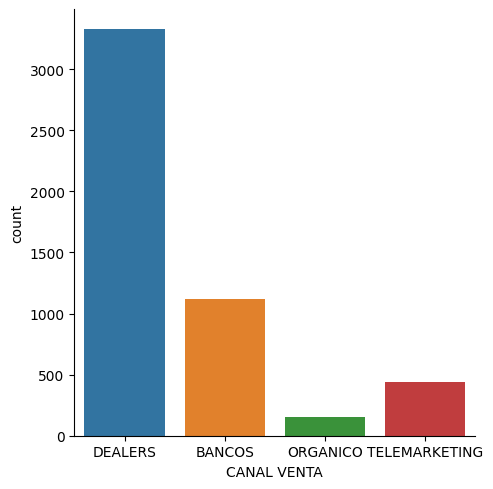

In [ ]:
sns.catplot(
    data=cdf,
    x='CANAL VENTA',
    kind='count'
)
plt.show()

In [ ]:
#¿Cuales son los DISTRIBUCION DEL PRODUCTO Y GIRO ECONOMICO más comunes?

canales=culqi_df['GIRO ECONOMICO'].value_counts()
print("Giro economico comunes:")
print(canales)

Giro economico comunes:
COMERCIO              9032
SERVICIO              4541
TRANSPORTE            2286
RESTAURANTES          2204
TELECOMUNICACIONES    2196
OTROS                 2187
Name: GIRO ECONOMICO, dtype: int64


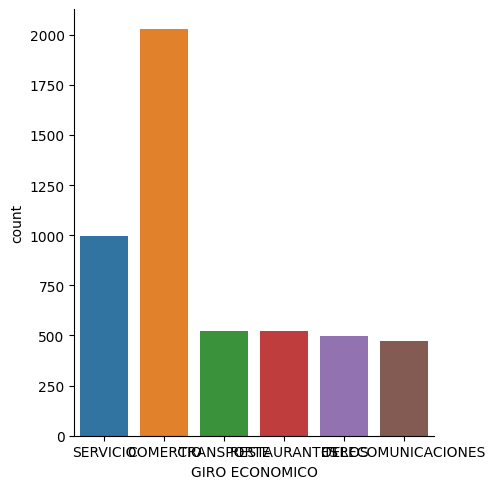

In [ ]:
sns.catplot(
    data=cdf,
    x='GIRO ECONOMICO',
    kind='count'
)
plt.show()

In [ ]:
canales=culqi_df['PRODUCTO'].value_counts()
print("Producto comunes:")
print(canales)

Producto comunes:
CULQI FULL      11926
CULQI PRO        3770
CULQI LINK       3143
CULQI MINI       1636
SUPER POS        1209
CULQI ONLINE      760
CULQI SHOP          2
Name: PRODUCTO, dtype: int64


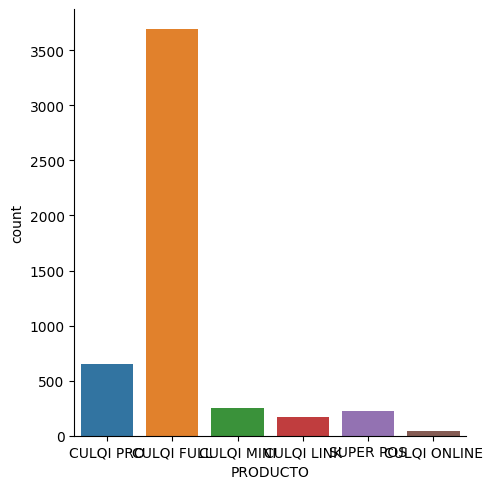

In [ ]:
sns.catplot(
    data=cdf,
    x='PRODUCTO',
    kind='count'
)
plt.show()

In [ ]:
cdf['PRODUCTO'].value_counts()

In [ ]:
#¿Que productos se venden más?

plt.figure(figsize=(10,20)),
sns.catplot(
    data=cdf,
    x='PRODUCTO',
    kind='count'
)
plt.show()


In [ ]:
#¿Cómo se distribuyen las ventas entre los diferentes departamentos?
Ventas_Departamento=cdf.groupby('DEPARTAMENTO')['VENTA ACTIVA'].sum()
print(Ventas_Departamento)


In [ ]:
Ventas_Departamento.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de ventas por departamento')
plt.xlabel('DEPARTAMENTO')
plt.ylabel('VENTAS')
plt.show()

In [ ]:
#¿Cómo se distribuyen las ventas entre los diferentes productos?
Ventas_Producto=cdf.groupby('PRODUCTO')['VENTA ACTIVA'].sum()
print(Ventas_Producto)

PRODUCTO
CULQI FULL      3690
CULQI LINK       172
CULQI MINI       250
CULQI ONLINE      47
CULQI PRO        654
SUPER POS        221
Name: VENTA ACTIVA, dtype: int64


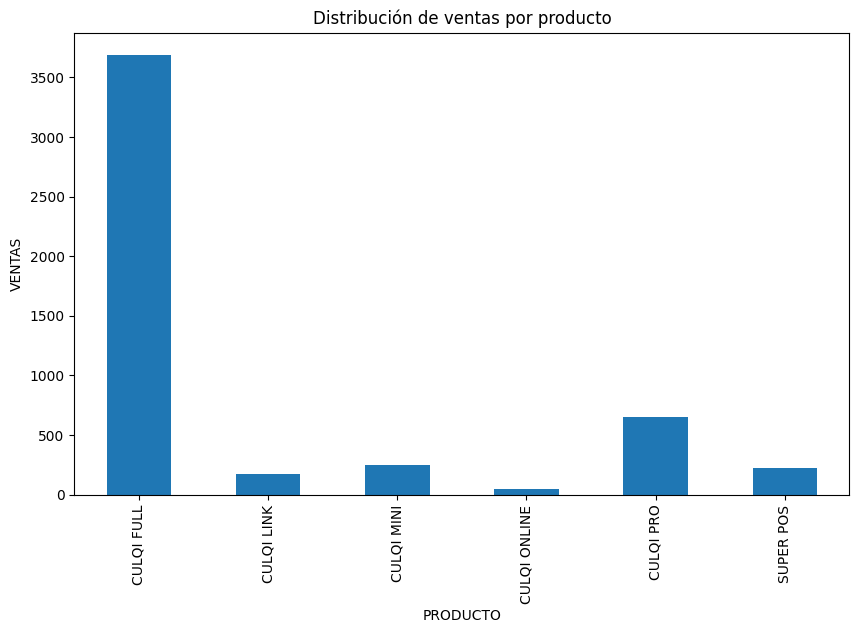

In [ ]:
Ventas_Producto.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de ventas por producto')
plt.xlabel('PRODUCTO')
plt.ylabel('VENTAS')
plt.show()

In [ ]:
#¿Cómo se distribuyen las ventas entre los diferentes productos?
Ventas_Producto=cdf.groupby('PRODUCTO')['VENTA ACTIVA'].sum()


#cuando quiero quitar una categoría
Ventas_Producto=Ventas_Producto.drop('CULQI FULL')
print(Ventas_Producto)

PRODUCTO
CULQI LINK      172
CULQI MINI      250
CULQI ONLINE     47
CULQI PRO       654
SUPER POS       221
Name: VENTA ACTIVA, dtype: int64


In [ ]:
#Ahora cual es la venta por Producto:
Ventas_Producto = cdf.groupby('PRODUCTO')['VENTA ACTIVA'].sum()

#Cuando quiero quitar una categoria:
Ventas_Producto = Ventas_Producto.drop('CULQI FULL')

print(Ventas_Producto)
Ventas_Producto.plot(kind='bar', figsize=(10, 6))


plt.show()

In [ ]:
#Producto filtrado:

Ventas_Producto_Filtrado = Ventas_Producto[Ventas_Producto.index != 'CULQI PRO']
print(Ventas_Producto_Filtrado)

Ventas_Producto_Filtrado.plot(kind='bar', figsize=(10, 6))

plt.show()

In [ ]:
#¿Hay algún vendedor específico que tenga un rendimiento notablemente alto o bajo?

# Calcular el total de ventas por vendedor
ventas_por_vendedor =culqi_df.groupby('VENDEDOR')['FLUJO MES VENTA'].sum()
ventas_por_vendedor.sort_values(ascending=False)

In [ ]:
# Vendedor con las ventas más altas
vendedor_mas_ventas = ventas_por_vendedor.idxmax()
ventas_mas_altas = ventas_por_vendedor.max()
print(vendedor_mas_ventas)
print(ventas_mas_altas)

In [ ]:
# Vendedor con las ventas más bajas
vendedor_menos_ventas = ventas_por_vendedor.idxmin()
ventas_mas_bajas = ventas_por_vendedor.min()
print(vendedor_menos_ventas)
print(ventas_mas_bajas)

Análisis Temporal:

* ¿Hay alguna tendencia observable en las ventas a lo largo del tiempo?
* ¿Existen patrones estacionales o eventos específicos que afecten las ventas?

In [ ]:
#¿Hay alguna tendencia observable en las ventas a lo largo del tiempo?
plt.figure(figsize=(15,10))
ventas_diarias = cdf.groupby('FECHA VENTA').size()
ventas_diarias.plot()



In [ ]:
#¿Existen patrones estacionales o eventos específicos que afecten las ventas?
#Si existen patron estacional en el ultimo trimestre del año.
cdf.info()

Relaciones:

* ¿Hay alguna relación entre el canal de venta y el tipo de producto?
* ¿Los diferentes giros económicos prefieren ciertos productos o canales sobre otros?

In [ ]:
#¿Hay alguna relación entre el canal de venta y el tipo de producto?
tab = pd.crosstab(cdf['CANAL VENTA'],cdf['TIPO PRODUCTO'])

sns.heatmap(tab)
plt.show()


In [ ]:
#¿Los diferentes giros económicos prefieren ciertos productos o canales sobre otros?
tab = pd.crosstab(cdf['GIRO ECONOMICO'],cdf['PRODUCTO'])

sns.heatmap(tab)
plt.show()


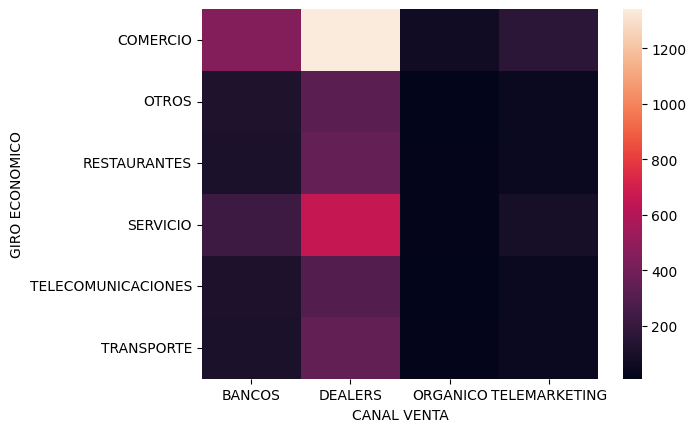

In [ ]:
tab = pd.crosstab(cdf['GIRO ECONOMICO'],cdf['CANAL VENTA'])

sns.heatmap(tab)
plt.show()

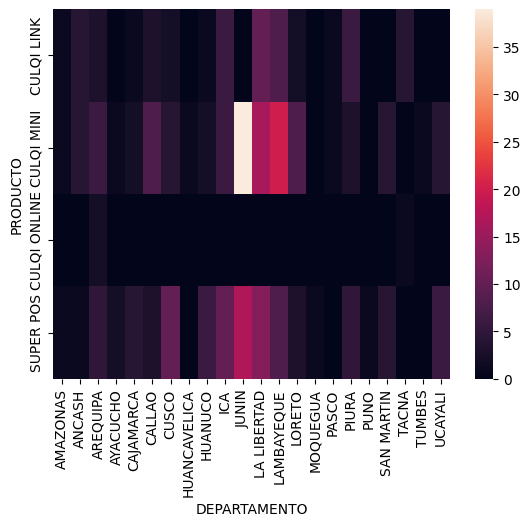

In [ ]:
cdf=cdf[cdf['VENDEDOR'] != 'ND']
cdf=cdf[cdf['PRODUCTO'] != 'CULQI FULL']
cdf=cdf[cdf['PRODUCTO'] != 'CULQI PRO']
cdf=cdf[cdf['DEPARTAMENTO'] != 'LIMA']

tab = pd.crosstab(cdf['PRODUCTO'],cdf['DEPARTAMENTO'])


sns.heatmap(tab)
plt.show()

Análisis de Clientes:

* ¿Cuántos clientes únicos hay en el dataset (basándonos en 'RUC CLIENTE')?
* ¿Hay clientes que compren repetidamente o que tengan un alto volumen de compras?

In [ ]:
#¿Cuántos clientes únicos hay en el dataset (basándonos en 'RUC CLIENTE')?
clientes_unicos = cdf['RUC CLIENTE'].nunique()

clientes_unicos


In [ ]:
clientes_unicos = cdf['RUC CLIENTE'].unique()

print(clientes_unicos)

In [ ]:
#¿Hay clientes que compren repetidamente o que tengan un alto volumen de compras?
df = cdf['RUC CLIENTE'].value_counts()

Top_5 = df.head(5)

print(Top_5)
